# Plotting networks

In this notebook, we'll look at a few ways to plot networks: mainly, by directly plotting the adjacency matrix or via network layouts.

## Plotting adjacency matricies

Lets start by plotting a very simple network - this happens to be one of the most famous toy datasets in network science, the Karate Club dataset. 

In [38]:
import networkx as nx

g = nx.karate_club_graph()

First, we'll extract the adjacency matrix representation.

In [39]:
nodelist = list(g.nodes)

A = nx.to_numpy_array(g, nodelist=nodelist)

A

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

We can plot the the adjacency matrix using a visualization commonly called a heatmap, 
for instance, using the `heatmap` function from `seaborn`.

<AxesSubplot:>

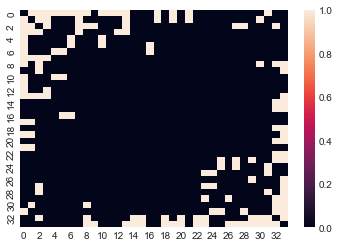

In [40]:
import seaborn as sns

sns.heatmap(A)

We can also use the heatmap function in `graspologic`, which essentially just wraps that
of `seaborn` and adds a few useful features when plotting adjacency matrices. You can read 
more about these in the [`graspologic` documentation for `heatmap`](https://microsoft.github.io/graspologic/latest/reference/reference/plotting.html#heatmap).

<AxesSubplot:>

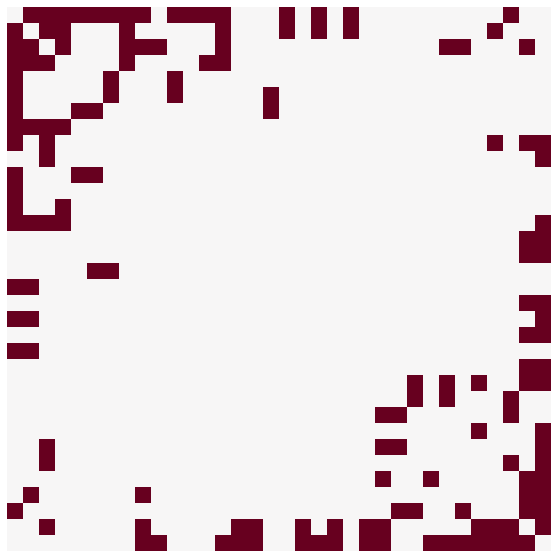

In [41]:
from graspologic.plot import heatmap

heatmap(A, cbar=False)

As we mentioned in [](representing_networks.ipynb), any permutation of this 
adjacency matrix represents the same graph. Let's see how this same plot looks with a 
different permutation.

In [42]:
# generate a random permutation

import numpy as np

rng = np.random.default_rng(8888)

n = len(A)  # n is the number of nodes
perm = rng.permutation(n)

perm

array([ 1, 12,  9,  2,  0, 13, 30,  7, 24, 28, 16, 14, 32, 15, 17, 10,  4,
       33,  5, 27, 26, 29, 18, 19,  3, 21, 25, 31, 11, 23,  6,  8, 20, 22])

```{admonition} Question

The operation `A[perm]` permutes the *rows* of an adjacency matrix only. In general, 
will this permutation of the rows of always `A` still represent the same network?

```

<AxesSubplot:>

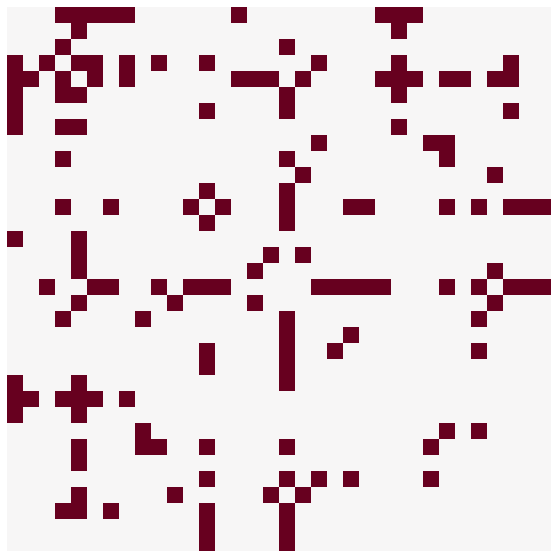

In [43]:
A_perm = A[perm][:, perm]

heatmap(A_perm, cbar=False)

This highlights part of why plotting with adjacency matrices can be difficult - depending
on the permutation you use, the perception of the network can be very different. It is important
to keep this in mind when plotting or looking at plots of adjacency matrices. 

Often, it can be a good idea to have some specific way to sort the adjacency matrix - here, I infer some groups or communities in the network, and then use those as a partition of the adjacency matrix. I also sort the nodes in order within each community in descending order by degree. We'll talk more about both of these concepts later in the course. 

In [44]:
from graspologic.partition import leiden

partition_map = leiden(g, trials=100)

labels = np.vectorize(partition_map.get)(nodelist)

labels

array([1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2])

<AxesSubplot:>

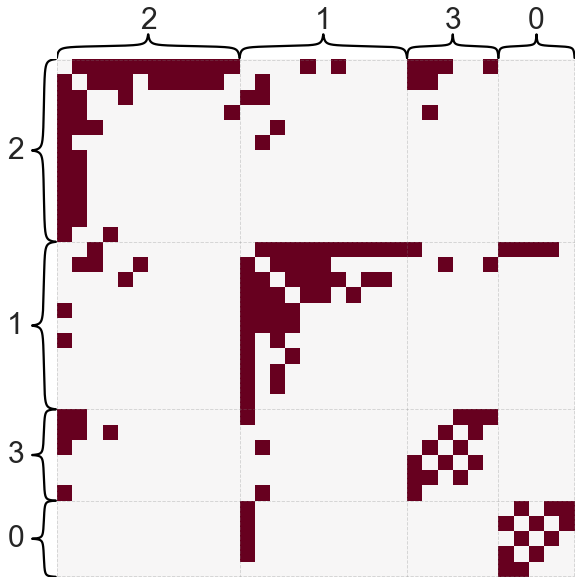

In [45]:
heatmap(A, inner_hier_labels=labels, sort_nodes=True, cbar=False)

Let's try plotting on a more interesting, real world dataset. This one is a connectome
dataset from a region of the *Drosophila* larva brain called the mushroom body.

<AxesSubplot:>

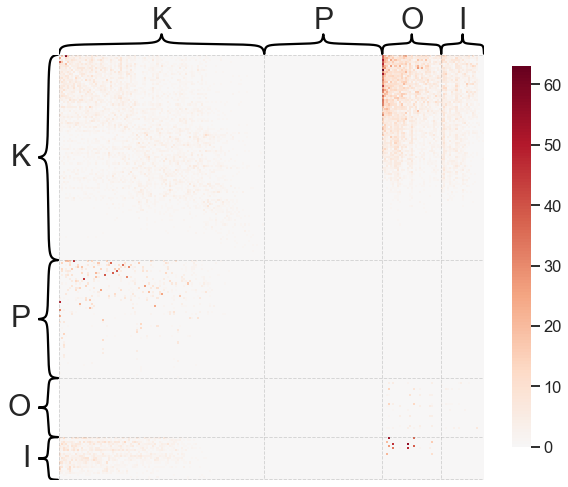

In [46]:
from graspologic.datasets import load_drosophila_left

A, labels = load_drosophila_left(return_labels=True)

heatmap(A, inner_hier_labels=labels, sort_nodes=True)

Note that this is a weighted network (hence the scale bar to the right) and that we've used
some node labels to sort the adjacency matrix. Often, it can be helpful to ignore or transform
the weights of a network to make the visualization more clear when weights cover multiple orders of
magnitude.

<AxesSubplot:>

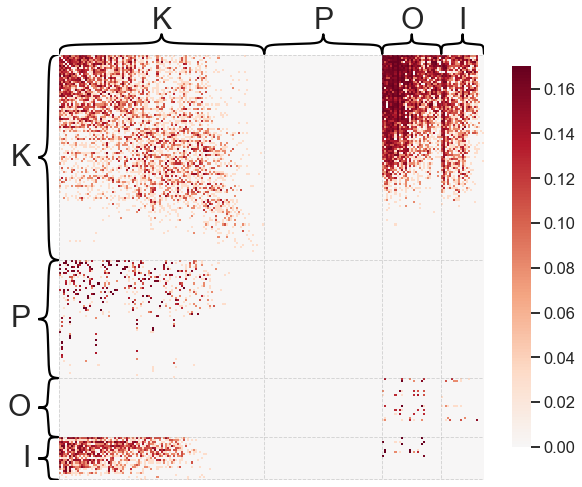

In [47]:
heatmap(A, inner_hier_labels=labels, sort_nodes=True, transform='simple-all')

For large, sparse networks, heatmaps can be difficult to use. This is because with enough 
nodes, there aren't enough pixels on your screen to have a unique row/column in the adjacency 
matrix. Also, there is often lots of metadata associated with the nodes of a network which
you may want to incorporate into an adjacency matrix visualization. `graspologic` has a 
more complex function called `adjplot` for dealing with adjacency matrices with
associated metadata that can handle this kind of plot - see the tutorial [here](https://microsoft.github.io/graspologic/latest/tutorials/plotting/matrixplot.html). If you are interested in more complex adjacency matrix
visualizations.

## Plotting network layouts

Another common way to look at networks is via **network layouts**, sometimes called ball-and-stick diagrams or many other names. 

`NetworkX` has a few simple functions for drawing networks.

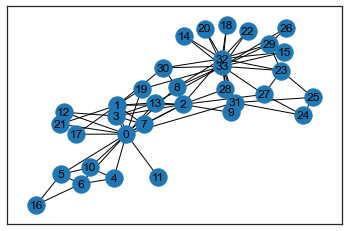

In [48]:
nx.draw_networkx(g)

We can use [`matplotlib`](https://matplotlib.org/) to make things look a little nicer.

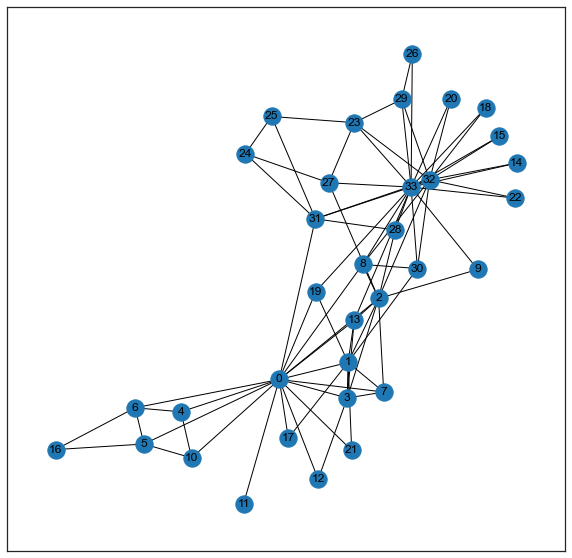

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

nx.draw_networkx(g, ax=ax)

`NetworkX` has a few functions for computing nice-looking positions for each node - one of my favorites for 
small-ish networks is `kamada_kawai_layout`.

In [50]:
pos = nx.kamada_kawai_layout(g)
pos

{0: array([0.02595264, 0.33261791]),
 1: array([-0.15415403,  0.25105994]),
 2: array([ 0.07281129, -0.00339833]),
 3: array([0.15120782, 0.23250616]),
 4: array([0.19313543, 0.57445429]),
 5: array([0.1899636 , 0.67901702]),
 6: array([-0.00442196,  0.69195753]),
 7: array([0.28351952, 0.21023576]),
 8: array([-0.17565775, -0.00990143]),
 9: array([ 0.0706129 , -0.28925159]),
 10: array([0.37980825, 0.53262302]),
 11: array([-0.18776547,  0.6332519 ]),
 12: array([0.43374412, 0.37950472]),
 13: array([-0.0851201 ,  0.05268196]),
 14: array([-0.50006702, -0.31244434]),
 15: array([-0.46577851, -0.42902514]),
 16: array([0.15957838, 1.        ]),
 17: array([-0.279331  ,  0.51420533]),
 18: array([-0.39589977, -0.53439666]),
 19: array([-0.2753847 ,  0.06921985]),
 20: array([-0.293375  , -0.61554259]),
 21: array([-0.37319088,  0.43635094]),
 22: array([-0.15864175, -0.64280203]),
 23: array([ 0.23606483, -0.5155009 ]),
 24: array([ 0.57008117, -0.29665386]),
 25: array([ 0.54879029, -

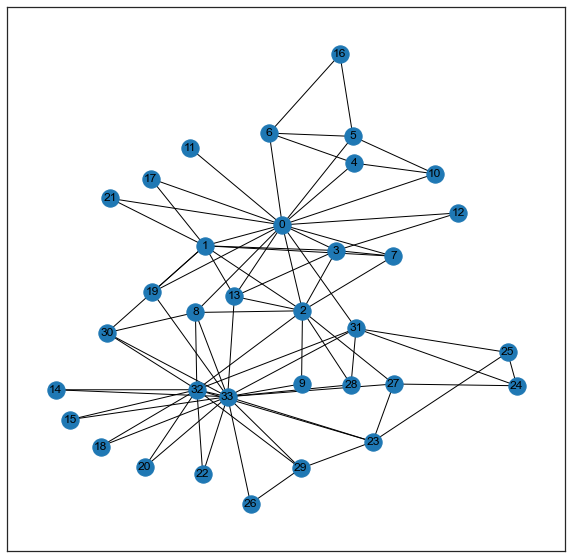

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

nx.draw_networkx(g, pos=pos, ax=ax)

With a little tweaking of colors, text, etc., these layouts can be somewhat informative for smaller networks. Here is a plot I made of a network of neuroscience researchers at Hopkins, and how they were linked via various collaborations. The code can be found [here](https://docs.neurodata.io/notebooks/pedigo/graspologic/plotting/2021/03/18/kavli.html).

![](./images/kavliome.png)

`graspologic` also has a similar function for plotting network layouts, which can be useful for plotting if one has node attributes (such as community labels) that should be added into the plot.

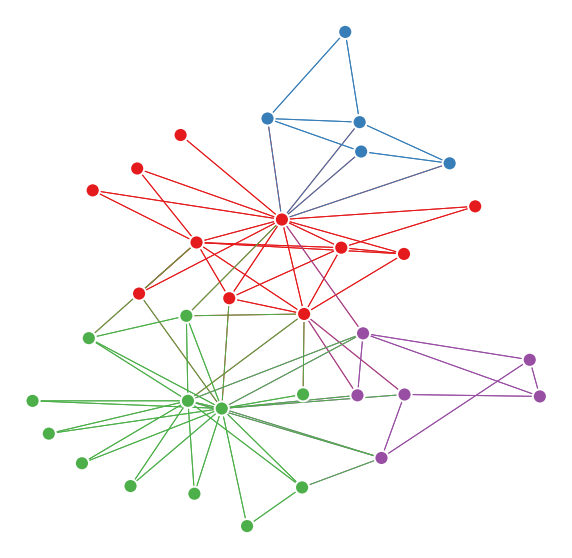

In [52]:
from graspologic.plot import networkplot

xs = []
ys = []
for node in nodelist:
    xs.append(pos[node][0])
    ys.append(pos[node][1])
xs = np.array(xs)
ys = np.array(ys)

A = nx.to_numpy_array(g, nodelist=nodelist)
partition_map = leiden(g, trials=100)
labels = np.vectorize(partition_map.get)(nodelist)

ax = networkplot(
    A,
    x=xs,
    y=ys,
    node_alpha=1.0,
    edge_alpha=1.0,
    edge_linewidth=1.0,
    node_hue=labels,
    node_kws=dict(s=200, linewidth=2),
)
_ = ax.axis('off')

For larger networks, it is often helpful to use something called a **network embedding** to compute positions for each node. The plots also have to often be modified - it can become unwieldy to try to view every node and edge when there are thousands or millions of each. Below is an example of one of these higher-level network layouts computed on the [hemibrain connectome dataset](https://www.janelia.org/project-team/flyem/hemibrain). The code to generate this plot can be found [here](https://docs.neurodata.io/notebooks/pedigo/graspologic/connectome/2021/05/06/hemibrain-layout.html). We'll talk about all of the ingredients that go into the plot below throughout the course.

![](./slides/slide_images/hemibrain-layout.png)